In [1]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
import numpy as np

In [2]:
df = pd.read_csv('../datasets/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
c = Counter(df.Class)
for k, v in c.items():
    print(f'Class {k} Number of samples {v}; {round(v * 100 /len(df), 4)}% of total.')

Class 0 Number of samples 284315; 99.8273% of total.
Class 1 Number of samples 492; 0.1727% of total.


Highly imbalanced dataset. <br>
Only 492 samples for fraud transaction.

Lets check distributions of features. <br>
All the features except time and transaction amount are PCA tansformed

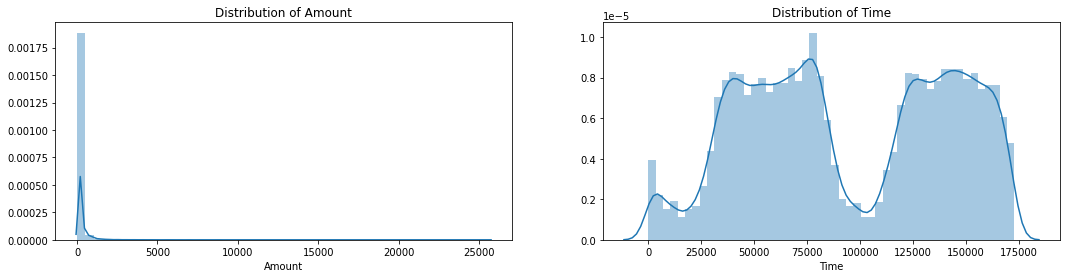

In [6]:
fig, ax = plt.subplots(1, 2, figsize = (18, 4))

sns.distplot(df.Amount, ax = ax[0])
ax[0].set_title('Distribution of Amount')

sns.distplot(df.Time, ax = ax[1])
ax[1].set_title('Distribution of Time')

plt.show()

Curious to check average amount of fraud and time

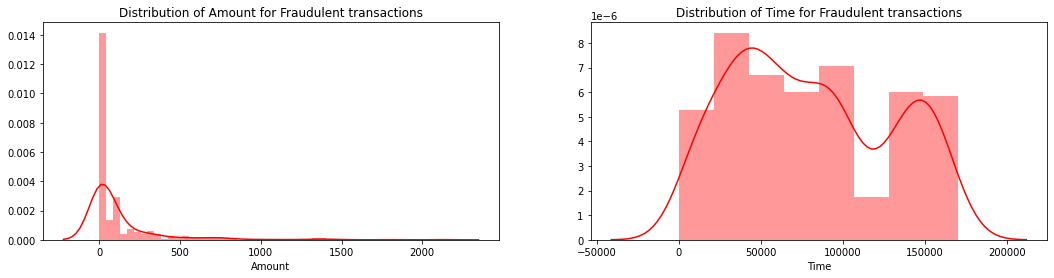

In [7]:
df_fraud = df.loc[df.Class == 1][['Time', 'Amount']]

fig, ax = plt.subplots(1, 2, figsize = (18, 4))

sns.distplot(df_fraud.Amount, ax = ax[0], color = 'red')
ax[0].set_title('Distribution of Amount for Fraudulent transactions')

sns.distplot(df_fraud.Time, ax = ax[1], color = 'red')
ax[1].set_title('Distribution of Time for Fraudulent transactions')

plt.show()

In [8]:
df_fraud.describe()

,Time,Amount
count,492.000000,492.000000
mean,80746.806911,122.211321
std,47835.365138,256.683288
min,406.000000,0.000000
25%,41241.500000,1.000000
50%,75568.500000,9.250000
75%,128483.000000,105.890000
max,170348.000000,2125.870000


In [9]:
scaler = RobustScaler()
df['ScaledAmt'] = scaler.fit_transform(df.Amount.to_numpy().reshape(-1, 1))
df['ScaledTime'] = scaler.fit_transform(df.Time.to_numpy().reshape(-1, 1))

df.drop(columns = ['Amount', 'Time'], inplace = True)

In [10]:
df.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,ScaledAmt,ScaledTime
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


In [11]:
df_fraud = df.loc[df.Class == 1]

983


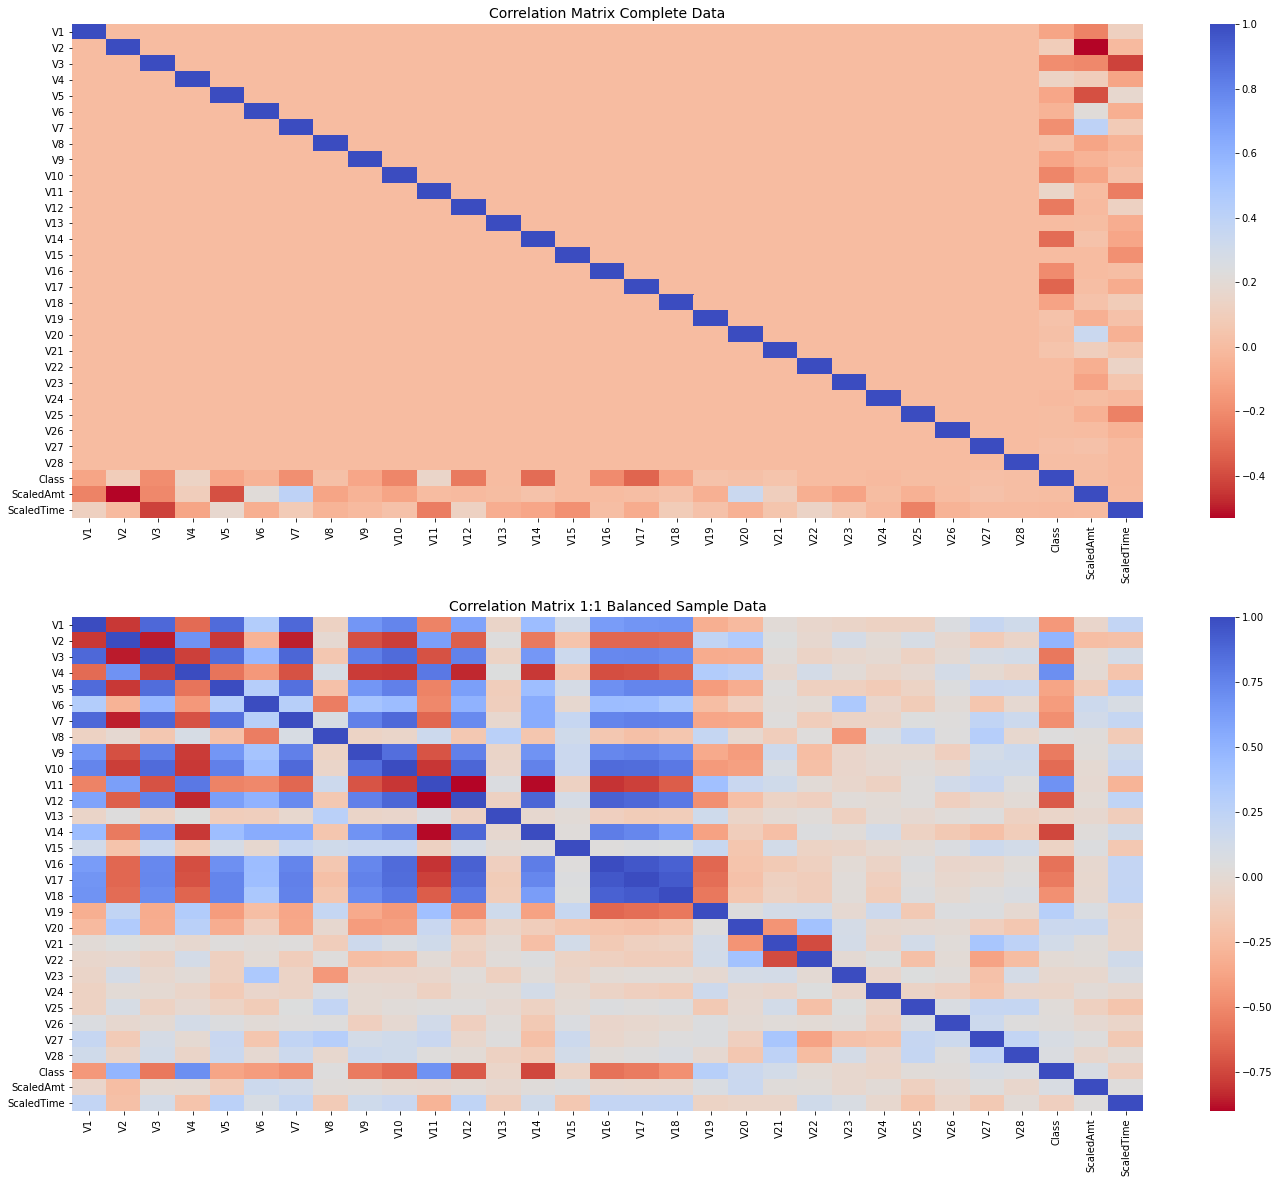

In [12]:
corr_df = df.corr()
sample_df = pd.concat([df.sample(n=492, random_state = 63).loc[df.Class == 0], df_fraud])
print(len(sample_df))

# Make sure we use the subsample in our correlation
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

sns.heatmap(corr_df, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Correlation Matrix Complete Data", fontsize=14)

sample_df_corr = sample_df.corr()
sns.heatmap(sample_df_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('Correlation Matrix 1:1 Balanced Sample Data', fontsize=14)
plt.show()

In [13]:
corr_cols = []
for i in range(15):
    sample_df = pd.concat([df.sample(n=492, random_state = i).loc[df.Class == 0], df_fraud])   
    sample_corr_df = sample_df.corr()
    corr_cols += sample_corr_df.loc[sample_corr_df.Class > 0.03][['Class']].index.to_list()
    corr_cols += sample_corr_df.loc[sample_corr_df.Class < -0.03][['Class']].index.to_list()
    
c = Counter(corr_cols)
c.most_common(30)

[('V2', 15),
 ('V4', 15),
 ('V8', 15),
 ('V11', 15),
 ('V19', 15),
 ('V20', 15),
 ('V21', 15),
 ('V27', 15),
 ('V28', 15),
 ('Class', 15),
 ('ScaledAmt', 15),
 ('V1', 15),
 ('V3', 15),
 ('V5', 15),
 ('V6', 15),
 ('V7', 15),
 ('V9', 15),
 ('V10', 15),
 ('V12', 15),
 ('V14', 15),
 ('V16', 15),
 ('V17', 15),
 ('V18', 15),
 ('V24', 15),
 ('ScaledTime', 15),
 ('V26', 12),
 ('V15', 12),
 ('V13', 12),
 ('V25', 8)]

In [14]:
sample_corr_df.sort_values(by = 'Class')[['Class']][:10]

,Class
V14,-0.746437
V12,-0.683165
V10,-0.624679
V16,-0.594767
V3,-0.566481
V17,-0.560480
V9,-0.550255
V7,-0.474688
V18,-0.471115
V1,-0.414739


In [15]:
sample_corr_df.sort_values(by = 'Class', ascending = False)[['Class']][:10]

,Class
Class,1.000000
V4,0.712982
V11,0.677061
V2,0.481459
V19,0.265056
V20,0.147227
V21,0.130465
V26,0.084912
V27,0.076839
V8,0.056728


In [16]:
features = ['V1','V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9','V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18','V19']

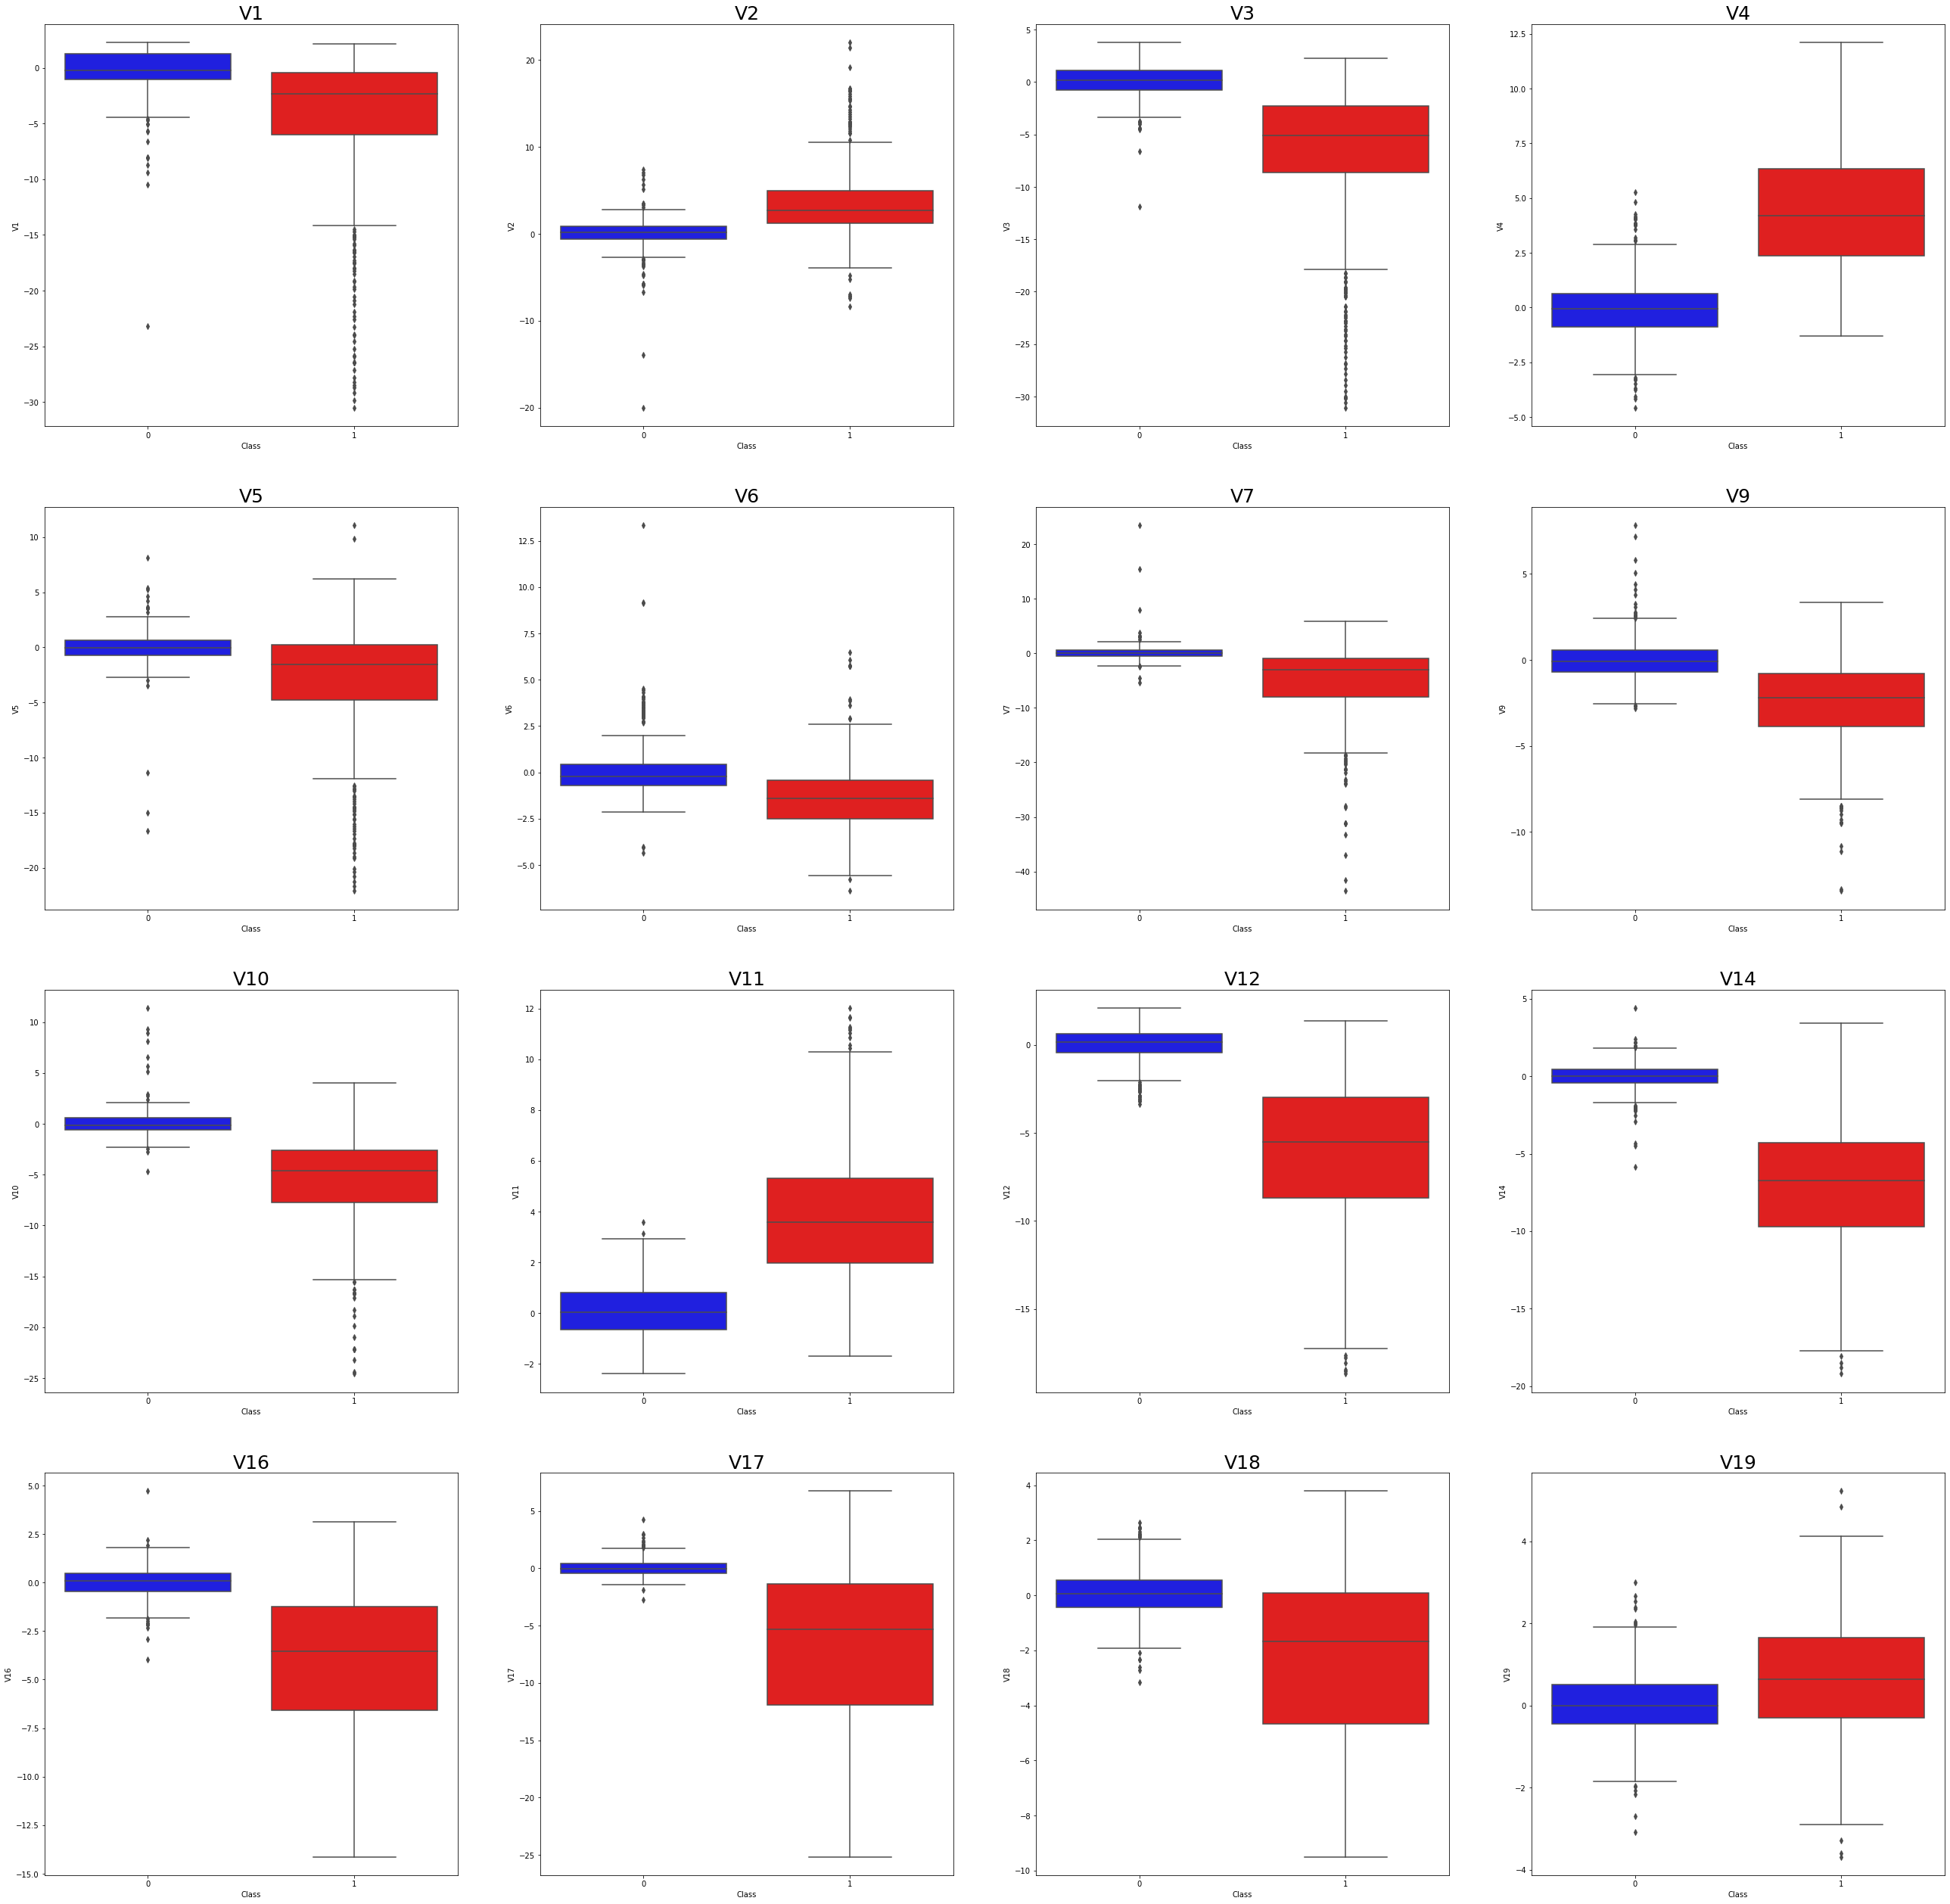

In [17]:
#features = ['V14', 'V12', 'V10', 'V16', 'V3', 'V9', 'V17', 'V7', 'V4', 'V11', 'V2', 'V19']
nrows, ncols = 4, 4
f, axes = plt.subplots(nrows = 4,  ncols= 4 , figsize=(45,45))
i = 0
for row in range(nrows):
    for col in range(ncols):
        sns.boxplot(x='Class', y=features[i], data=sample_df, ax=axes[row, col], palette= ['blue', 'red'])
        axes[row, col].set_title(f'{features[i]}',  fontsize=25)
        i+=1
plt.show()

V16, V17, V4 : No outliers <br>
V14, V12, V19, V11: Few outliers <br>
V10, V3, V9, V7, V2: Many outliers <br>

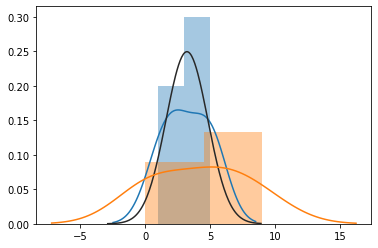

In [18]:
from scipy.stats import norm

sns.distplot([1,2,5,3,5], fit=norm)
sns.distplot([5,6,1,9,0])

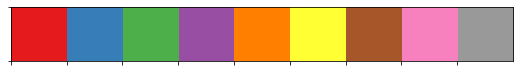

In [19]:
sns.palplot(sns.color_palette("Set1"))

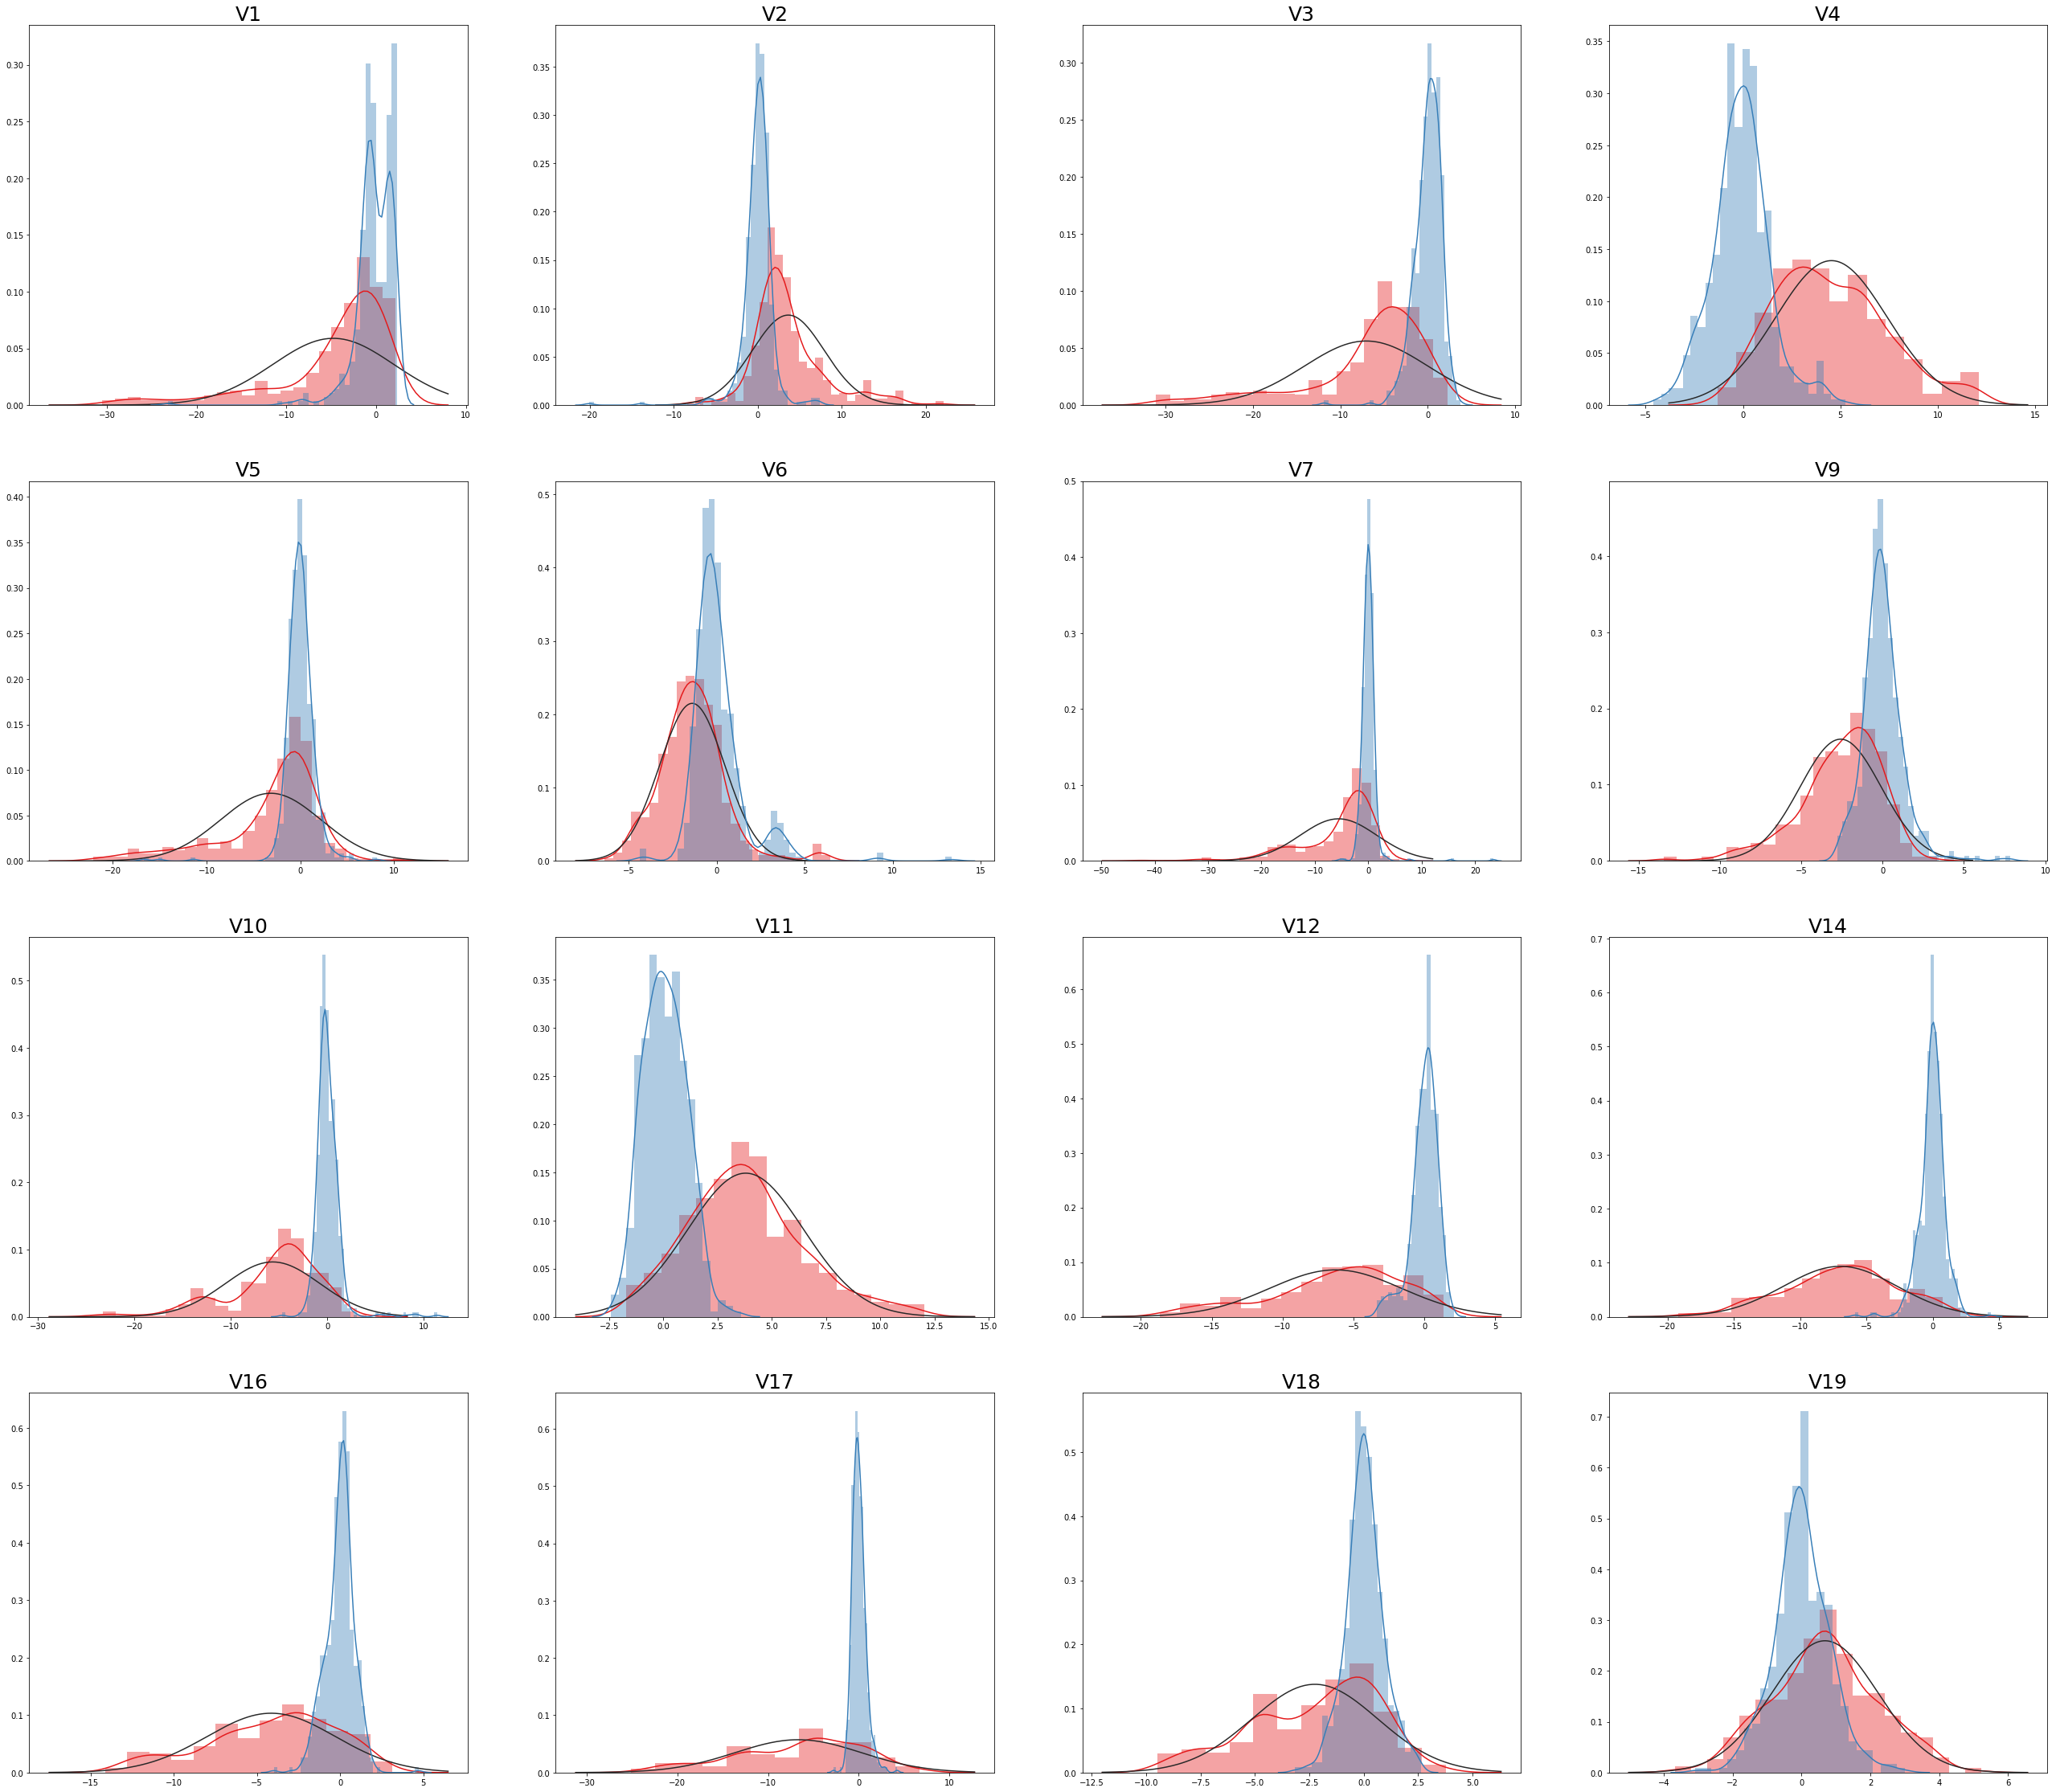

In [20]:
from scipy.stats import norm

f, ax = plt.subplots(nrows = 4,  ncols= 4 , figsize=(45, 40))

cmap = sns.color_palette("Set2", 16)
cmap1 = sns.color_palette("Set1", 2)
#sns.husl_palette(10, h=.5)
i = 0
for row in range(nrows):
    for col in range(ncols):
        data = sample_df[features[i]].loc[sample_df['Class'] == 1].values
        sns.distplot(data, ax=ax[row, col], fit=norm, color = cmap1[0])
        
        data = sample_df[features[i]].loc[sample_df['Class'] == 0].values
        sns.distplot(data, ax=ax[row, col], color = cmap1[1])
        
        ax[row, col].set_title(f'{features[i]}',  fontsize=25)
        i+=1


Intutive it makes sense to select features which are able to distingush between class 0 and 1. We select features for which intersect least in the above plots. eg. v1, v2, v5, v6, v9 are intersects more than rest.
eg. v4, v10, v11, v12, v14 looks like they are intersecting less than others.

Lets do the same plots after removing outliers.

In [21]:
sample_df[features].describe()

,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,-2.480637,1.811513,-3.501945,2.223658,-1.590426,-0.655336,-2.755475,-1.283015,-2.813656,1.944825,-3.121943,-3.502234,-2.071307,-3.314304,-1.103602,0.342344
std,5.527522,3.766030,6.236986,3.253308,4.272304,1.849247,5.929553,2.360302,4.585848,2.741693,4.594856,4.650428,3.479834,5.982800,2.426767,1.277044
min,-30.552380,-20.056784,-31.103685,-4.591328,-22.105532,-6.406267,-43.557242,-13.434066,-24.588262,-2.398996,-18.683715,-19.214325,-14.129855,-25.162799,-9.498746,-3.681904
25%,-2.939486,-0.115664,-5.113334,-0.140140,-1.798298,-1.559879,-3.060742,-2.338449,-4.593030,-0.087403,-5.495221,-6.721799,-3.562710,-5.302111,-1.796355,-0.429905
50%,-0.886392,0.973181,-1.369045,1.292592,-0.432277,-0.618286,-0.690688,-0.718269,-0.887982,1.135700,-0.806400,-1.114620,-0.670246,-0.506686,-0.313699,0.184383
75%,0.891683,2.816333,0.331043,4.229802,0.487720,0.132539,0.256980,0.113494,0.004437,3.586130,0.247944,0.075567,0.286570,0.283083,0.371679,0.982620
max,2.304203,22.057729,3.803246,12.114672,11.095089,13.348714,23.475217,7.839365,11.383763,12.018913,2.094797,4.405951,4.720959,6.739384,3.790316,5.228342


In [22]:

for feature in features:
    
    print(f'{feature}')
    v_fraud = sample_df[feature].loc[sample_df['Class'] == 1].values
    q25, q75 = np.percentile(v_fraud, 25), np.percentile(v_fraud, 75)
    print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
    v_iqr = q75 - q25
    print(f'Feature {feature} iqr: {v_iqr}')

    v_cut_off = v_iqr * 1.5
    v_lower, v_upper = q25 - v_cut_off, q75 + v_cut_off
    print(f'Cut Off: {v_cut_off}')
    print(f'Min: {round(np.min(v_fraud), 4)}, Max: {round(np.max(v_fraud), 4)}')
    print(f'Lower: {round(v_lower,4)}, Upper: {round(v_upper, 4)}')
    print('---'*10)
    print()

V1
Quartile 25: -6.03606299434868 | Quartile 75: -0.41920007625767897
Feature V1 iqr: 5.616862918091001
Cut Off: 8.4252943771365
Min: -30.5524, Max: 2.1324
Lower: -14.4614, Upper: 8.0061
------------------------------

V2
Quartile 25: 1.1882258198658224 | Quartile 75: 4.9712573249056025
Feature V2 iqr: 3.78303150503978
Cut Off: 5.67454725755967
Min: -8.4022, Max: 22.0577
Lower: -4.4863, Upper: 10.6458
------------------------------

V3
Quartile 25: -8.643489255766207 | Quartile 75: -2.27618472719291
Feature V3 iqr: 6.367304528573297
Cut Off: 9.550956792859946
Min: -31.1037, Max: 2.2502
Lower: -18.1944, Upper: 7.2748
------------------------------

V4
Quartile 25: 2.373049531845565 | Quartile 75: 6.348729456714095
Feature V4 iqr: 3.9756799248685297
Cut Off: 5.963519887302795
Min: -1.3133, Max: 12.1147
Lower: -3.5905, Upper: 12.3122
------------------------------

V5
Quartile 25: -4.79283487176241 | Quartile 75: 0.21456159835449123
Feature V5 iqr: 5.007396470116901
Cut Off: 7.51109470517

In [23]:
balanced_sample = sample_df[['V4', 'V14', 'V9', 'V11', 'V12', 'V16', 'V17', 'V19', 'Class']]

In [24]:
balanced_sample.groupby('Class').count()

,V4,V14,V9,V11,V12,V16,V17,V19
Class,,,,,,,,
0,492,492,492,492,492,492,492,492
1,492,492,492,492,492,492,492,492


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

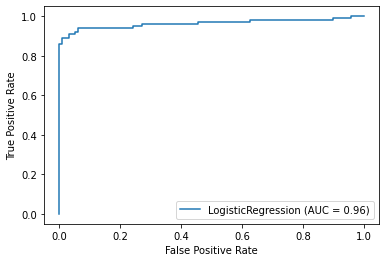

Recall: 0.8775510204081632


In [40]:
X = balanced_sample.drop(columns='Class')
y = balanced_sample['Class']

from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
metrics.plot_roc_curve(lr, X_test, y_test) 
recall_score = metrics.recall_score(y_test, y_pred)
plt.show()  
print(f'Recall: {recall_score}')


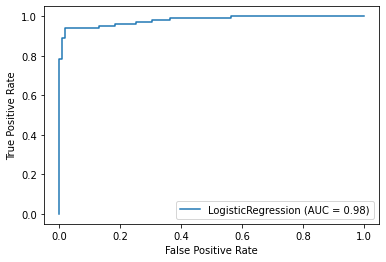

Recall: 0.8877551020408163


In [43]:
#sample_df
sample_df = pd.concat([df.sample(n=492, random_state = 14).loc[df.Class == 0], df_fraud])
X = sample_df.drop(columns='Class')
y = sample_df['Class']

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
metrics.plot_roc_curve(lr, X_test, y_test) 
recall_score = metrics.recall_score(y_test, y_pred)
plt.show()  
print(f'Recall: {recall_score}')